In [16]:
%matplotlib inline

import numpy as np
import pylab as plt
import tensorflow as tf

sess = tf.InteractiveSession()

In [162]:
x = tf.Variable([-1.9,0.1147,1.9],tf.float32)

dist1 = tf.contrib.distributions.Normal(0.0, 1.0)
y1 = dist1.prob(x)
z1 = dist1.sample(1000000)

dist2 = tf.contrib.distributions.Normal(0.2, 1.0)
z2 = dist2.sample(1000000)

# ttt = dist2.kl_divergence(z1)

kl = tf.distributions.kl_divergence(dist1,dist2)

# Bins will be:  (-inf, 1), [1, 2), [2, 3), [3, 4), [4, inf)
nbins = 100
value_range = [-3.0, 3.0]
hist1 = tf.histogram_fixed_width(z1, value_range, nbins=nbins)
hist2 = tf.histogram_fixed_width(z2, value_range, nbins=nbins)
hist1 = tf.to_double(hist1)/1000000
hist2 = tf.to_double(hist2)/1000000

kln = tf.reduce_sum(hist1*tf.log(hist1/hist2))

In [163]:
sess.run(tf.global_variables_initializer())
print(sess.run(kl))
print(sess.run(kln))

0.020000001
0.020636394625709077


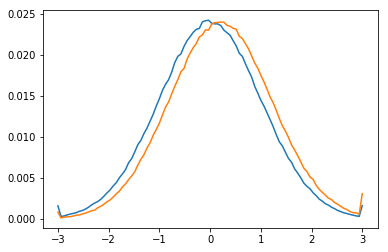

In [164]:
np.linspace(value_range[0],value_range[1],nbins)
y1,y2 = sess.run([hist1,hist2])
x = np.linspace(value_range[0],value_range[1],nbins)
plt.plot(x,y1)
plt.plot(x,y2)

In [165]:
from scipy.stats import entropy
entropy(y2,y1)

0.020372272178896464